In [ ]:
# sample data
import numpy as np
import pandas as pd
import yfinance as yf 
a = np.array([[1, 2], [3, 4]])
b = np.array([[1], [3]])
np.dot(a, b)

df1 = yf.download(["AAPL", "GOOG", "TSLA"], start="2024-01-01")
df = np.log(1+df1["Adj Close"].pct_change())

In [68]:
import numpy as np
import pandas as pd
from datetime import datetime
import json
# calculations
def getLogReturnByStockPrice(df) -> pd.DataFrame:
    df = np.log(1+df1["Adj Close"].pct_change())
    return df
def portfolioReturn(df, weights):
    return np.dot(df.mean(), weights)

def portfolioStd(df, weights, year=250):
    return np.dot(np.dot(df.cov(), weights), weights) ** (1/2) * np.sqrt(year)

def weightsCreator(df):
    rand = np.random.random(len(df.columns))
    rand /= rand.sum()
    return rand

def getWeightsByMontecarlo(stock_price_df, num=10000):
    df = getLogReturnByStockPrice(stock_price_df)
    returns = []
    stds = []
    w = []
    for _ in range(num):
        weights = weightsCreator(df)
        
        returns.append(portfolioReturn(df, weights)) # weighted return
        stds.append(portfolioStd(df, weights, 250)) # portfolio stadnard deviation vector calc
        w.append(weights)

    min_std = min(stds)
    index_min = stds.index(min_std)
    return w[index_min]

def getDF(codename_list, start_time, end_time):
    df = pd.DataFrame()
    for codename in codename_list:
            try:
                symbol = tw_stock_symbol_code[codename]
            except:
                symbol = tw_stock_symbol_code[check[codename]]
            data = pd.read_csv(f"../DB/TW/{symbol}.csv", index_col="Date")
            data_adj = data.loc[(data.index >= start_time) & (data.index <= end_time)]["Adj Close"]
            data_adj.name = symbol
            df = pd.concat([df, data_adj], axis=1)

    df.dropna(inplace=True)
    return df



# 前置資料: 股票代號中文對照(tw_stock_symbol_code)、各期成分股(data)、換股時間(time_start_end)
location = "../0056成份股季調整生效日期.xlsx"
time_df = pd.read_excel(location)
time_start_end = time_df.iloc[:, :2]
# 有對照錯誤的股票中文名稱
check = {'聚陽實業':'聚陽',
         "矽品": "矽品精密",
         "仁寶電腦":"仁寶",
         "群創光電":"群創",
         "微星科技":"微星",
         "智邦科技":"智邦",
         "群光電子":"群光",
         "聯強國際":"聯強",
         "創見資訊":"創見"
}

with open("../DB/0056_Ingred.json", "r", encoding="UTF-8") as f:
    data = json.load(f)

with open("../DB/tw_stock_symbol_code.json", "r") as f:
    tw_stock_symbol_code = json.load(f)

weighting = getWeightsByMontecarlo(df1, 500)

start_time_pre = "2017-06-26"
end_time_pre = "2017-09-26"


for i, season in enumerate(['17Q4']):
    start_time = datetime.strftime(time_start_end.iloc[i, 0], "%Y-%m-%d")
    end_time = datetime.strftime(time_start_end.iloc[i, 1], "%Y-%m-%d")
    df = getDF(data[season], start_time, end_time)



weighting

array([0.789278  , 0.13766818, 0.07305382])

In [67]:
weighting

array([0.7786048 , 0.14207163, 0.07932357])

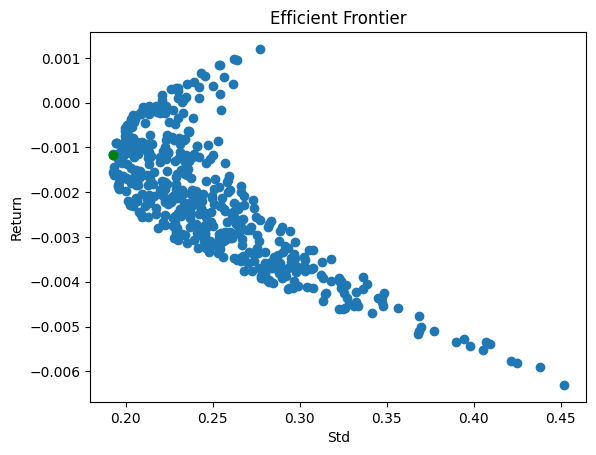

In [48]:
# plotting
import matplotlib.pyplot as plt
plt.scatter(stds, returns)
plt.scatter(min(stds), returns[stds.index(min(stds))], color="green")
plt.title("Efficient Frontier")
plt.xlabel("Std")
plt.ylabel("Return")
plt.show()

In [51]:
min_std = min(stds)
index_min = stds.index(min_std)
print("return of min portfolio stds: ", returns[index_min])
print("minimum std: ", min_std)
print("weights: ", w[index_min])

return of min portfolio stds:  -0.0011602592749129588
minimum std:  0.19272157813247656
weights:  [0.74733042 0.18437163 0.06829795]
